In [1]:
import importlib
import imageio.v2 as imageio
from patient import patient
import glob
import cupy as cp
from xray import xray

p = patient.patient(
    # name="4404151",
    name="4409573",
    # name="4411423",
    # name="4411557",
    do={'ct': False, 'drr': False, 'posdrr': False, 'fbp': False,
        'posfbp': False, 'resize': False},
    skip_done=False
)

# xrayset = xray.xrayset(
    
#         name="__phantom",
#         sheets=450,
#         voltage=120,
#         height=1024,
#         output_height=500
#     )

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mlp
import scipy.stats as stats
import cupy as cp

rc('text', usetex=True)
mlp.use('pgf')
mlp.rc('font', family='Noto Serif CJK JP')
# mlp.rcParams['Hiragino Sans']
# plt.rcParams['text.usetex'] = True

from matplotlib.ticker import PercentFormatter

def plot_hist(img, **kwargs):
    plt.hist(cp.asnumpy(img).ravel(), bins=64, range=(0, 256), density=True, **kwargs)
    # plt.hist(cp.asnumpy(img).ravel(), bins=64, range=(0, 256), alpha=0.3, density=True, **kwargs)

fig = plt.figure(figsize=(4, 3), dpi=360)

# plt.ylim(0, 0.02)
# plt.xlim(0, 256)
# plot_hist(xrayset.img[0], color='black', label="x")
# plt.savefig("figs/graph/xray_histogram.png")
# plt.cla()

plt.ylim(0, 0.02)
plt.xlim(0, 256)
plot_hist(p.posdrr.img[0], color='C0', label="調整前DRR", alpha=0.7)
plt.legend()
plt.savefig("figs/graph/unadjusted_drr_histogram.png")
plt.cla()

plt.ylim(0, 0.02)
plt.xlim(0, 256)
plot_hist(p.drr.img[0], color='C0', label="調整後DRR", alpha=0.7)
plot_hist(xrayset.img[0], color='black', label="X線画像", linewidth=0.8,  histtype=u'step')
plt.legend()
plt.savefig("figs/graph/adjusted_drr_histogram.png")
plt.cla()

# # plt.hist(cp.asnumpy(p.posdrr.img[0]).ravel(), bins=256, range=(0.0, 256))
# plt.savefig("figs/graph/xray_histogram.png")
# plt.cla()

NameError: name 'xrayset' is not defined

### adjusted vs unadjusted fbp

In [85]:
imageio.imsave("figs/fbp/unadjusted.png", cp.asnumpy(p.posfbp.get(150)))
imageio.imsave("figs/fbp/adjusted.png", cp.asnumpy(p.fbp.get(150)))

81276

## registeration

In [2]:
import importlib
importlib.reload(patient)

import cv2

b = 150

imageio.imsave("figs/registeration/ct.png", cp.asnumpy(p.ct.img[b]))
imageio.imsave("figs/registeration/fbp.png", cp.asnumpy(p.get_resized_fbp(b, pos=True)))

img1 = imageio.imread("figs/registeration/ct.png")
img2 = imageio.imread("figs/registeration/fbp.png")

img2 = cp.asnumpy(p.hist_match(img2, cp.asnumpy(p.ct.img[b])))
imageio.imsave("figs/registeration/fbp_adjusted.png", img2)

imageio.imsave("figs/registeration/diff.png", img1 - img2)

Lossy conversion from int16 to uint8. Range [1, 235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 216.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-162.0, 182.5819209039548]. Convert image to uint8 prior to saving to suppress this warning.


## position & resize graphs

12.0338089015493
133


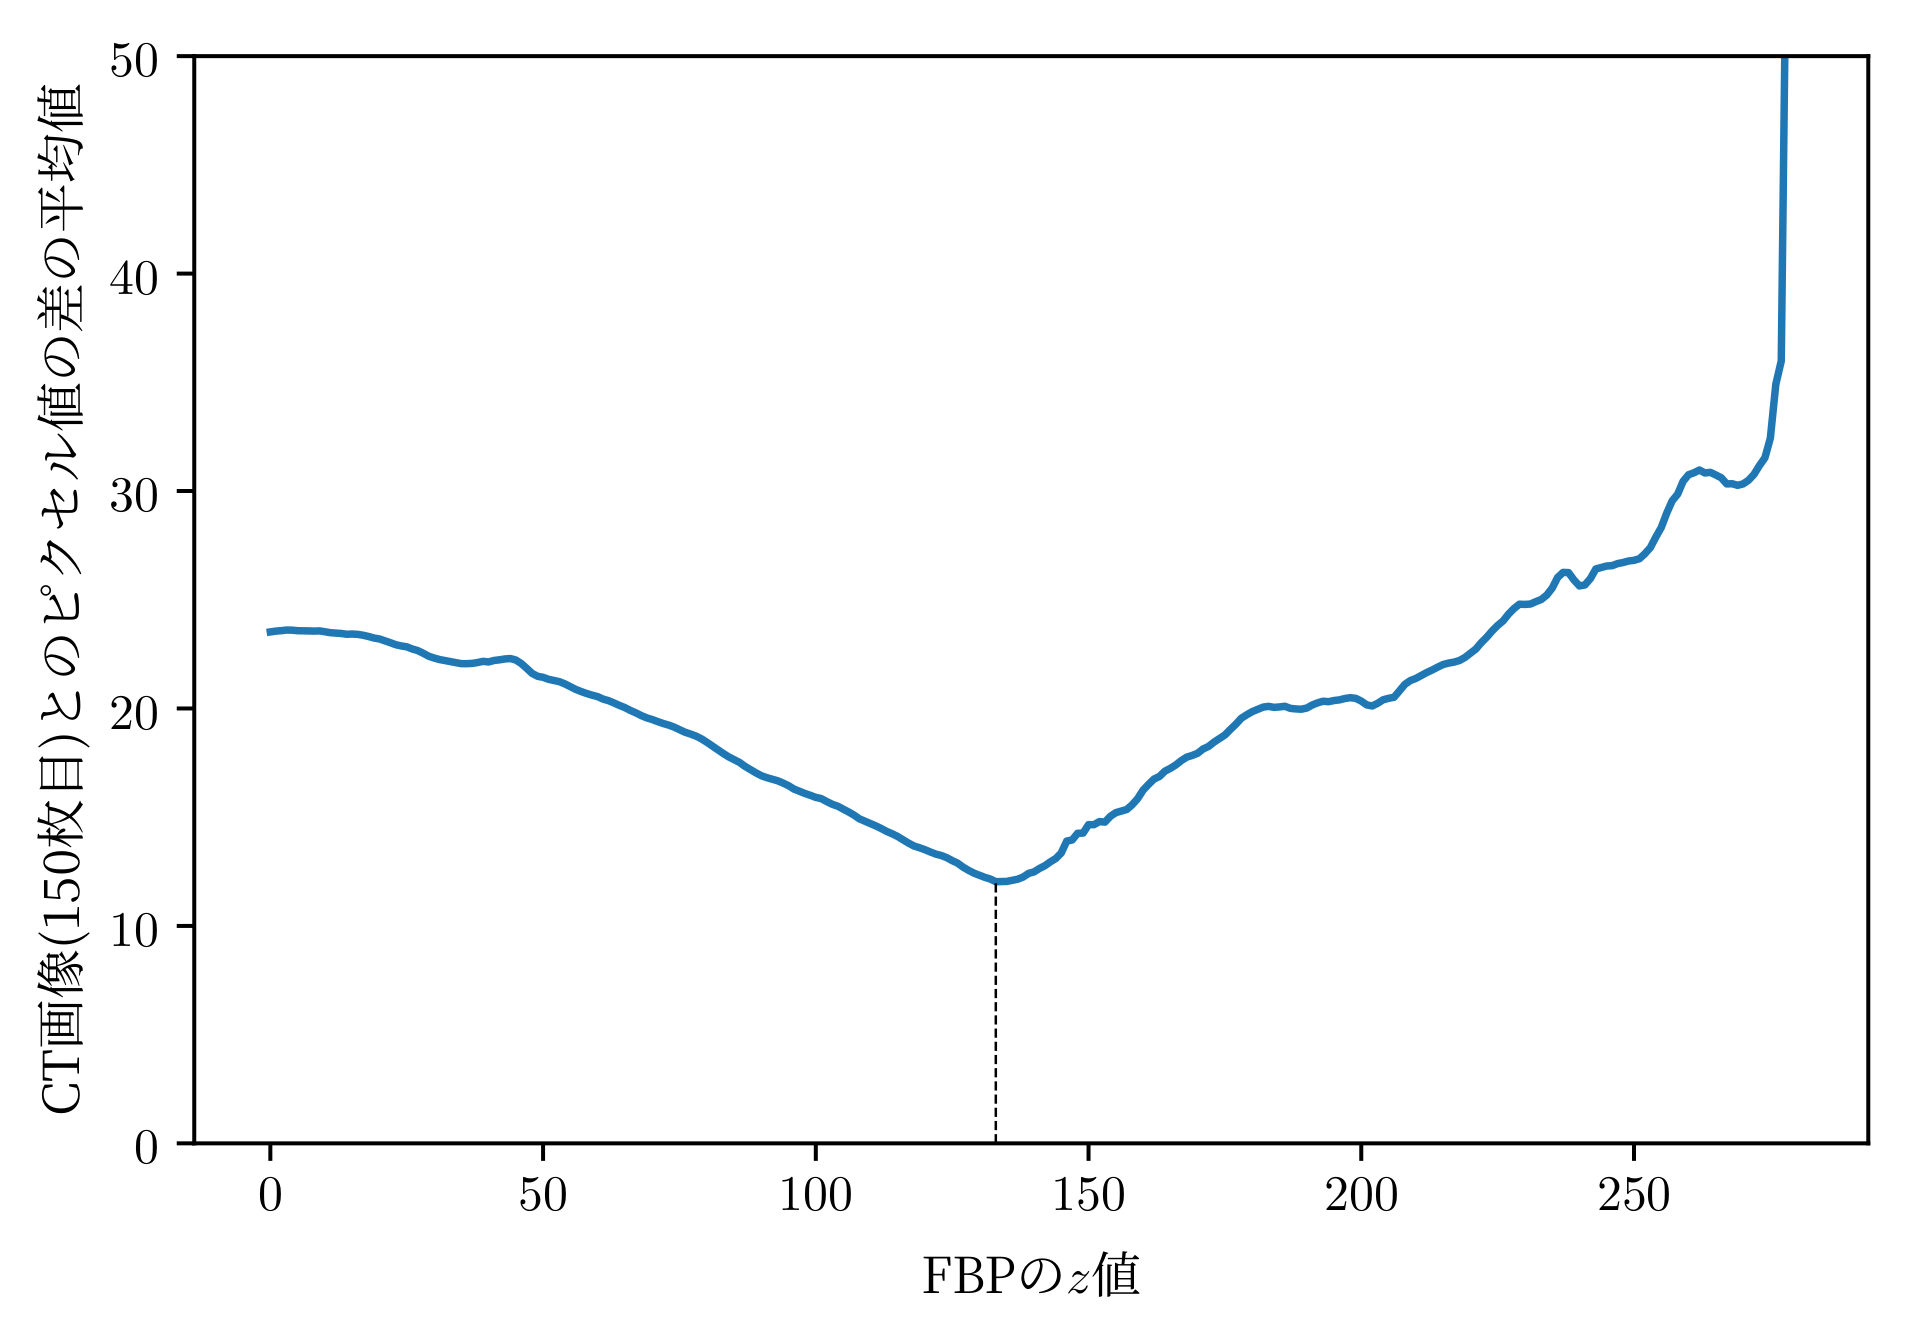

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mlp
import scipy.stats as stats
import cupy as cp

dat = p.get_equiv_data(b)

dat = np.flip(dat)
print(dat[133])
print(np.argmin(dat))

fig = plt.figure(figsize=(6, 4), dpi=360)

rc('text', usetex=True)
mlp.use('pgf')
mlp.rc('font', family='Noto Serif CJK JP')

plt.plot(dat)
plt.vlines(x=133, color='black', linestyle='dashed', linewidth=0.5, ymax=12, ymin=0)

plt.ylim(0, 50)
plt.xlabel(r"FBPの$z$値")
plt.ylabel("CT画像(150枚目)とのピクセル値の差の平均値")

plt.savefig("figs/graph/position.png")

In [3]:
imgs = [cp.asnumpy(img) for img in p.drr.img]

imageio.mimsave("x.gif", imgs)

In [3]:
%slack

In [ ]:
import importlib
import imageio.v2 as imageio
from patient import patient
import glob

poss = [50, 100, 150, 200]
vols = ["4404147", "4404366"]

for idx, vol in enumerate(vols):
    p = patient.patient(name=vol)
    for pos in poss:
        imageio.imsave(f"figures/ct_patient{idx}_{pos}.png",
                       cp.asnumpy(p.ct.img[pos]))

# imageio.mimsave(f"pics/drr.gif", p.drr.img)
%slack

In [89]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if ".ttc" in i.fname:
        print(i)

FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc', name='Noto Sans CJK JP', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')
FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc', name='Noto Serif CJK JP', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')
FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc', name='Noto Sans CJK JP', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')
FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc', name='Noto Serif CJK JP', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')
